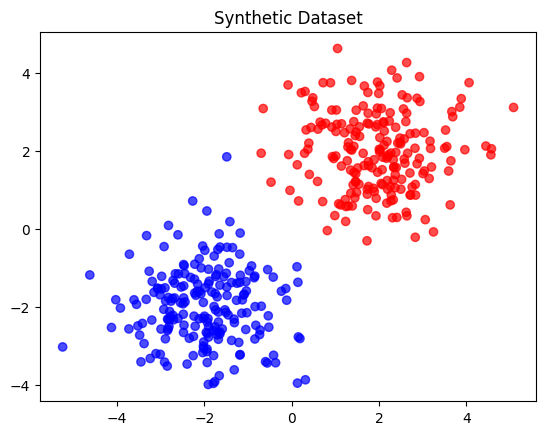

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

x0 = np.random.randn(200, 2) + np.array([-2, -2])
y0 = np.zeros(200)

x1 = np.random.randn(200, 2) + np.array([2, 2])
y1 = np.ones(200)

X = np.vstack((x0, x1))
y = np.hstack((y0, y1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", alpha=0.7)
plt.title("Synthetic Dataset")
plt.show()

In [2]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9875
Precision: 0.972972972972973
Recall: 1.0
F1 Score: 0.9863013698630136


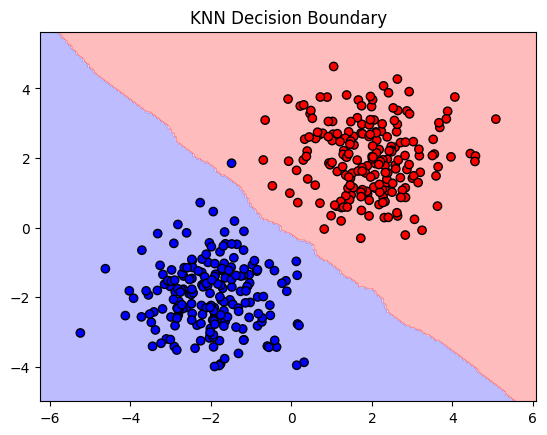

In [4]:
aa, bb = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
grid = np.c_[aa.ravel(), bb.ravel()]
preds = knn_model.predict(grid).reshape(aa.shape)

plt.contourf(aa, bb, preds, cmap="bwr", alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolors="k")
plt.title("KNN Decision Boundary")
plt.show()